┌ Info: Recompiling stale cache file /afs/inf.ed.ac.uk/user/s16/s1672897/.julia/compiled/v1.2/RMMMDNets/mJmbq.ji for RMMMDNets [7ea7fd3b-14e3-4223-94d2-c341911ad28e]
└ @ Base loading.jl:1240
┌ Info: Args
│   batch_size_gen = 200
│   batch_size = 200
│   Df_h = 50,25
│   Dg_h = 50,50
│   σ_last = identity
│   D_z = 10
│   D_fx = 5
│   dataset = gaussian
│   σ = tanh
│   opt = adam_akash
│   model_name = rmmmdnet
│   n_epochs = 100
│   σs = 1,2
│   base = uniform
│   lr = 0.001
│   seed = 1234
└ @ Main /afs/inf.ed.ac.uk/user/s16/s1672897/projects/RMMMDNets.jl/scripting.jl:85
┌ Info: Init rmmmdnet with 4,757 parameters
│   logdir = gaussian/rmmmdnet/opt=adam_akash-σ=tanh-σs=1,2-Df_h=50,25-Dg_h=50,50-base=uniform-D_fx=5-D_z=10/22092019-20-7-57
└ @ RMMMDNets /afs/inf.ed.ac.uk/user/s16/s1672897/projects/RMMMDNets.jl/src/RMMMDNets.jl:105
Progress: 100%|█████████████████████████████████████████| Time: 0:02:30


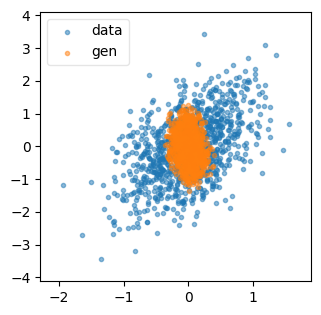

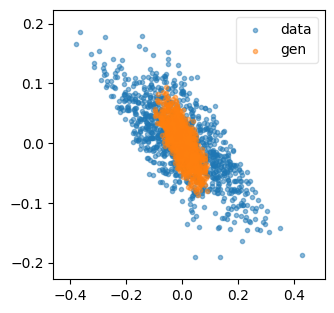

In [1]:
using MLToolkit: flatten_dict, dict2namedtuple

using Random: seed!
using RMMMDNets

;

In [ ]:
rmmmdnets_path = pathof(RMMMDNets) |> splitdir |> first |> splitdir |> first
include("$rmmmdnets_path/scripting.jl")

# dataset = "gaussian"
 dataset = "ring"
# dataset = "mnist"

# model_name = "mmdnet"
model_name = "rmmmdnet"

args = get_args(dataset, model_name)

###

function run_exp(args)
    data = get_data(args.dataset)
    
    seed!(args.seed)

    model = get_model(args, data)

    evaluate(data, model)

    dataloader = DataLoader(data, args.batch_size)
    
    train!(model, args.n_epochs, dataloader)
    
    return data, model
end

data, model = run_exp(args)

;

┌ Info: Args
│   batch_size_gen = 200
│   batch_size = 200
│   Df_h = 128
│   Dg_h = 128
│   σ_last = identity
│   D_z = 256
│   D_fx = 2
│   dataset = ring
│   σ = relu
│   opt = adam_akash
│   model_name = rmmmdnet
│   n_epochs = 10000
│   σs = 1
│   base = gaussian
│   lr = 0.001
│   seed = 1234
└ @ Main /afs/inf.ed.ac.uk/user/s16/s1672897/projects/RMMMDNets.jl/scripting.jl:85
┌ Info: Init rmmmdnet with 33,796 parameters
│   logdir = ring/rmmmdnet/opt=adam_akash-σ=relu-σs=1-Df_h=128-Dg_h=128-base=gaussian-D_fx=2-D_z=256/22092019-20-13-28
└ @ RMMMDNets /afs/inf.ed.ac.uk/user/s16/s1672897/projects/RMMMDNets.jl/src/RMMMDNets.jl:105
Progress:  60%|████████████████████████▌                |  ETA: 1:20:20